In [2]:
from helper import *
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors

### Load in primary amine and carboxylic acid BB datasets

In [3]:
pamine_df = pd.read_csv('../../files/pamine_df.csv')
cooh_df = pd.read_csv('../../files/cooh_df.csv')
umap_coordinates = pd.read_csv('../../files/truncates_UMAP.csv')

pamine_umap = pamine_df.merge(umap_coordinates, on='truncate_SMILES')
cooh_umap = cooh_df.merge(umap_coordinates, on='truncate_SMILES')

In [4]:
pamine_umap['mol'] = pamine_umap['BB_SMILES'].apply(Chem.MolFromSmiles)
cooh_umap['mol'] = cooh_umap['BB_SMILES'].apply(Chem.MolFromSmiles)

pamine_umap['MW'] = pamine_umap['mol'].apply(Descriptors.MolWt)
cooh_umap['MW'] = cooh_umap['mol'].apply(Descriptors.MolWt)

pamine_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in pamine_umap['mol']]
cooh_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in cooh_umap['mol']]

pamine_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in pamine_umap['mol']]
cooh_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in cooh_umap['mol']]

## Custom library enumeration

### Example 1: three libraries with constant cost and random selection, but different MW filters

#### Library 1: cost $\leq$ 250, MW $\leq$ 200, random selection (192 x 192)

In [21]:
lib1_cost = [250, 250]
lib1_mw = [200, 200]
lib1_nBBs = [192, 192]

lib1_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib1_cost[0]) & (pamine_umap['MW'] <= lib1_mw[0])]
lib1_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib1_cost[1]) & (cooh_umap['MW'] <= lib1_mw[1])]

lib1_p1_BBs = random_selection(lib1_p1_sele, lib1_nBBs[0], seed=0)
lib1_p2_BBs = random_selection(lib1_p2_sele, lib1_nBBs[1], seed=0)

library_1 = lib_enum(lib1_p1_BBs, lib1_p2_BBs)

#### Library 2: cost $\leq$ 250, MW $\leq$ 250, random selection (192 x 192)

In [22]:
lib2_cost = [250, 250]
lib2_mw = [250, 250]
lib2_nBBs = [192, 192]

lib2_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib2_cost[0]) & (pamine_umap['MW'] <= lib2_mw[0])]
lib2_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib2_cost[1]) & (cooh_umap['MW'] <= lib2_mw[1])]

lib2_p1_BBs = random_selection(lib2_p1_sele, lib2_nBBs[0], seed=0)
lib2_p2_BBs = random_selection(lib2_p2_sele, lib2_nBBs[1], seed=0)

library_2 = lib_enum(lib2_p1_BBs, lib2_p2_BBs)

#### Library 3: cost $\leq$ 250, MW $\leq$ 300, random selection (192 x 192)

In [23]:
lib3_cost = [250, 250]
lib3_mw = [300, 300]
lib3_nBBs = [192, 192]

lib3_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib3_cost[0]) & (pamine_umap['MW'] <= lib3_mw[0])]
lib3_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib3_cost[1]) & (cooh_umap['MW'] <= lib3_mw[1])]

lib3_p1_BBs = random_selection(lib3_p1_sele, lib3_nBBs[0], seed=0)
lib3_p2_BBs = random_selection(lib3_p2_sele, lib3_nBBs[1], seed=0)

library_3 = lib_enum(lib3_p1_BBs, lib3_p2_BBs)

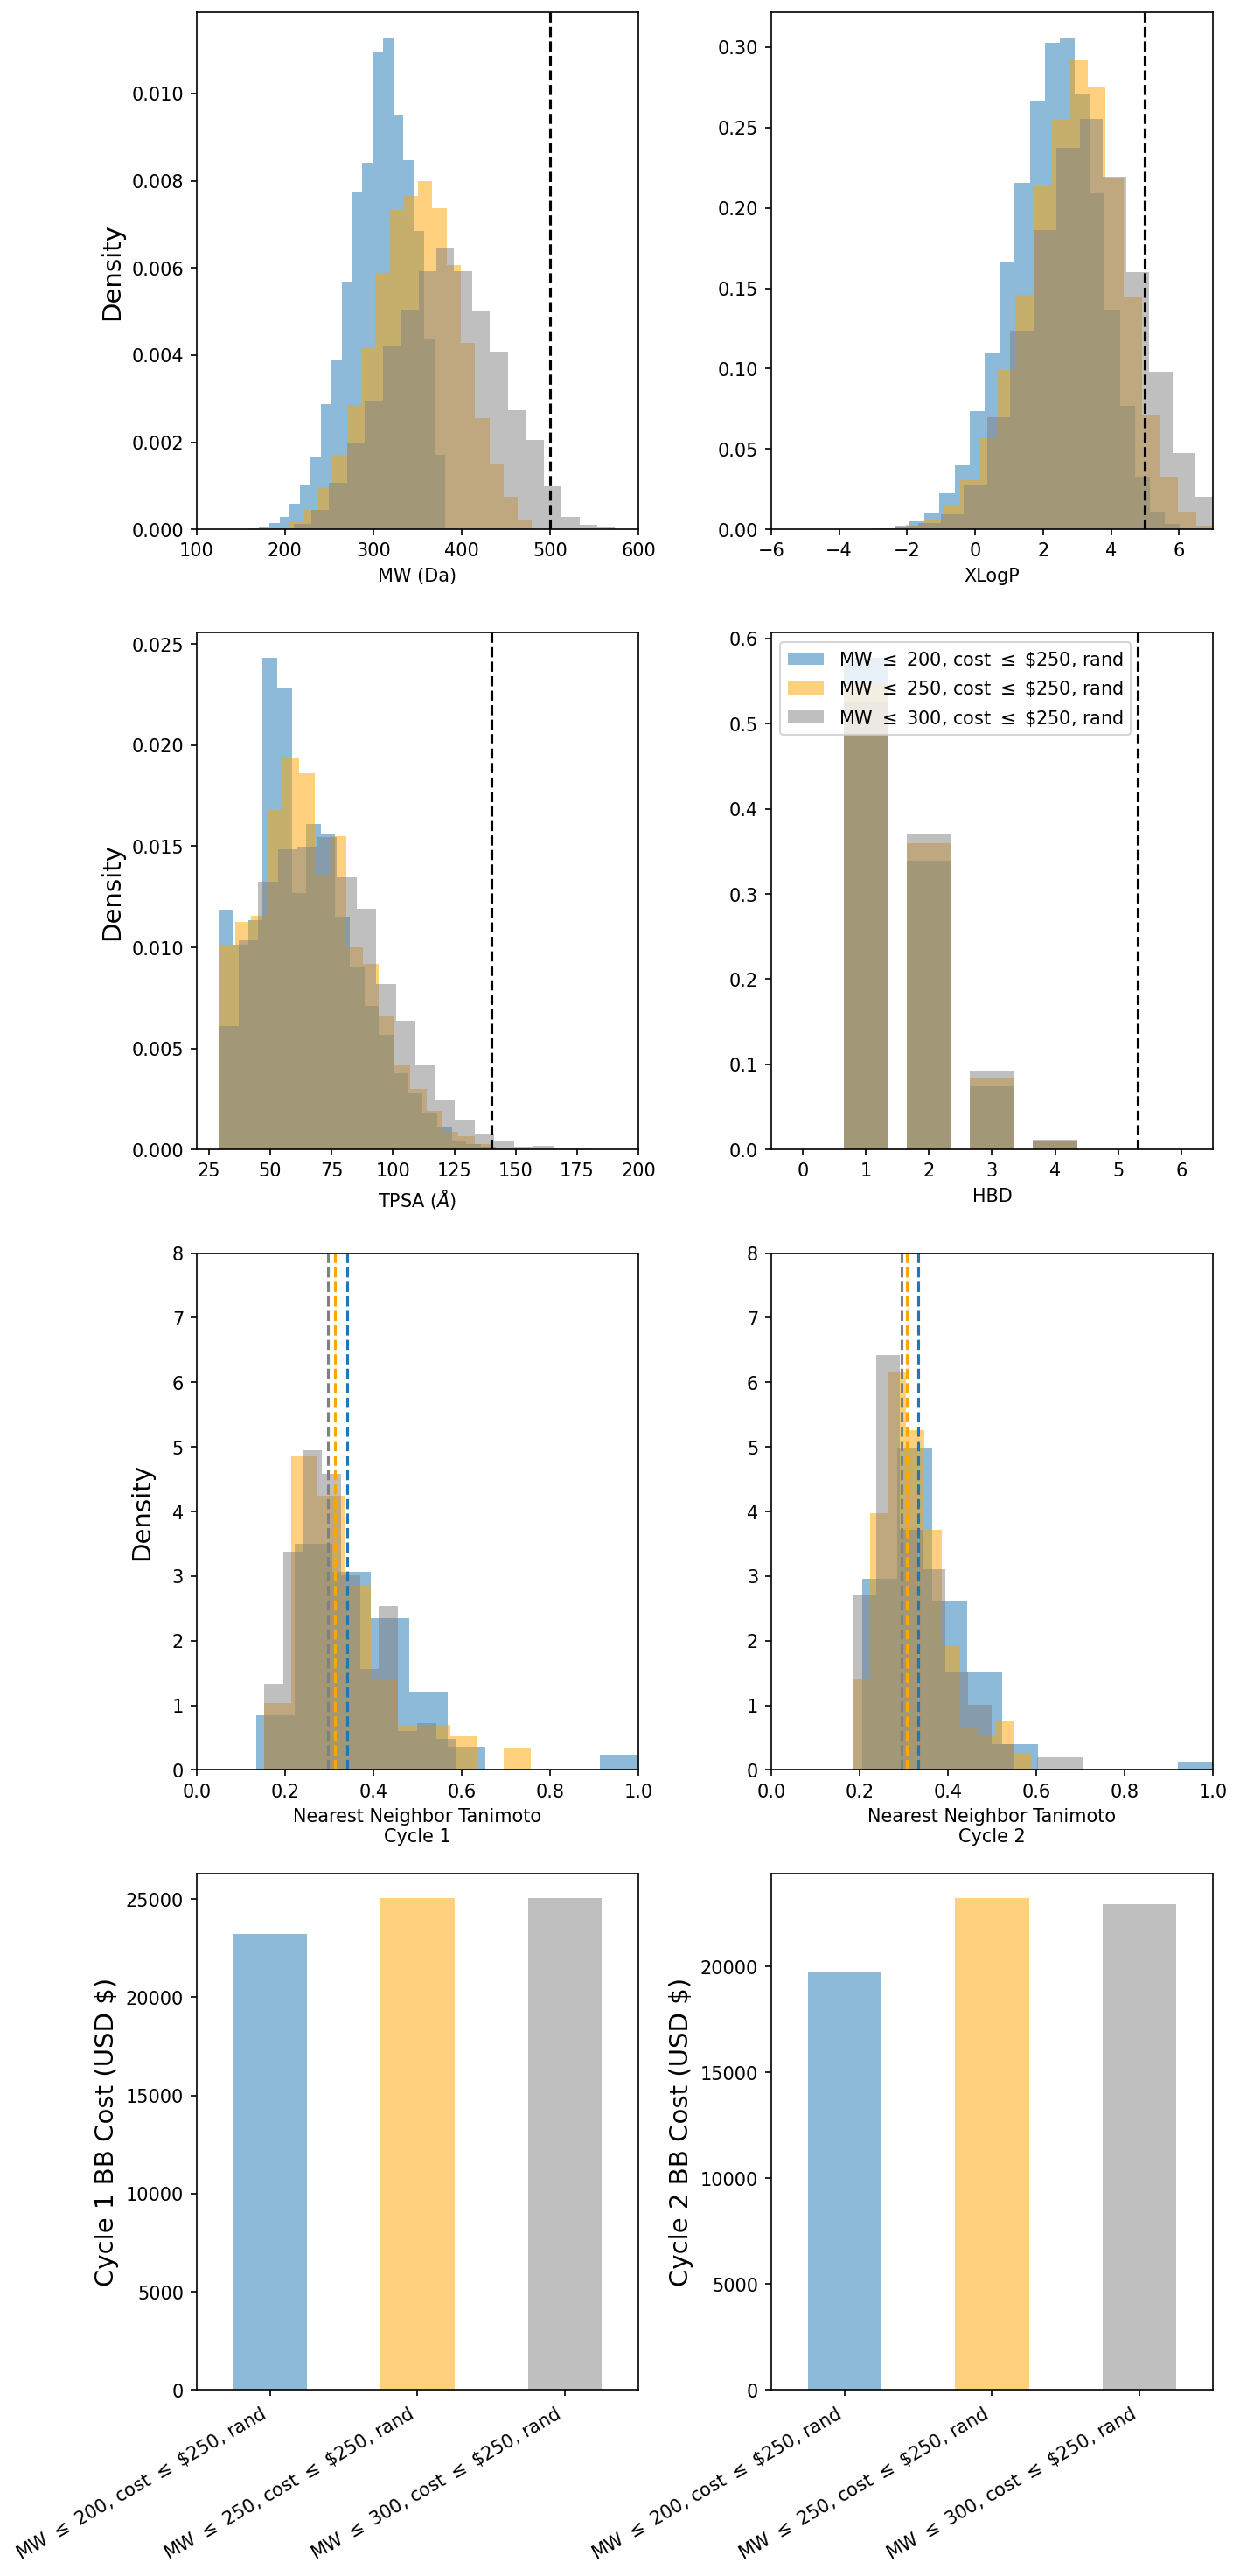

In [24]:
# Generate library summary
mw_fig = plot_library_stats(lib1_p1_BBs, lib1_p2_BBs, library_1, 'cost $\leq$ \$250, MW $\leq$ 200, rand',
                            lib2_p1_BBs, lib2_p2_BBs, library_2, 'cost $\leq$ \$250, MW $\leq$ 250, rand',
                            lib3_p1_BBs, lib3_p2_BBs, library_3, 'cost $\leq$ \$250, MW $\leq$ 300, rand')

# Save figure
#mw_fig.savefig('../../figures/lib_enum_MW.png', bbox_inches='tight')

### Example 2: three libraries with constant MW and random selection, but different cost filters

#### Library 1: cost $\leq$ 100, MW $\leq$ 250, random selection (192 x 192)

In [25]:
lib1_cost = [100, 100]
lib1_mw = [250, 250]
lib1_nBBs = [192, 192]

lib1_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib1_cost[0]) & (pamine_umap['MW'] <= lib1_mw[0])]
lib1_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib1_cost[1]) & (cooh_umap['MW'] <= lib1_mw[1])]

lib1_p1_BBs = random_selection(lib1_p1_sele, lib1_nBBs[0], seed=0)
lib1_p2_BBs = random_selection(lib1_p2_sele, lib1_nBBs[1], seed=0)

library_1 = lib_enum(lib1_p1_BBs, lib1_p2_BBs)

#### Library 2: cost $\leq$ 250, MW $\leq$ 250, random selection (192 x 192)

In [26]:
lib2_cost = [250, 250]
lib2_mw = [250, 250]
lib2_nBBs = [192, 192]

lib2_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib2_cost[0]) & (pamine_umap['MW'] <= lib2_mw[0])]
lib2_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib2_cost[1]) & (cooh_umap['MW'] <= lib2_mw[1])]

lib2_p1_BBs = random_selection(lib2_p1_sele, lib2_nBBs[0], seed=0)
lib2_p2_BBs = random_selection(lib2_p2_sele, lib2_nBBs[1], seed=0)

library_2 = lib_enum(lib2_p1_BBs, lib2_p2_BBs)

#### Library 3: cost $\leq$ 500, MW $\leq$ 250, random selection (192 x 192)

In [27]:
lib3_cost = [500, 500]
lib3_mw = [250, 250]
lib3_nBBs = [192, 192]

lib3_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib3_cost[0]) & (pamine_umap['MW'] <= lib3_mw[0])]
lib3_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib3_cost[1]) & (cooh_umap['MW'] <= lib3_mw[1])]

lib3_p1_BBs = random_selection(lib3_p1_sele, lib3_nBBs[0], seed=0)
lib3_p2_BBs = random_selection(lib3_p2_sele, lib3_nBBs[1], seed=0)

library_3 = lib_enum(lib3_p1_BBs, lib3_p2_BBs)

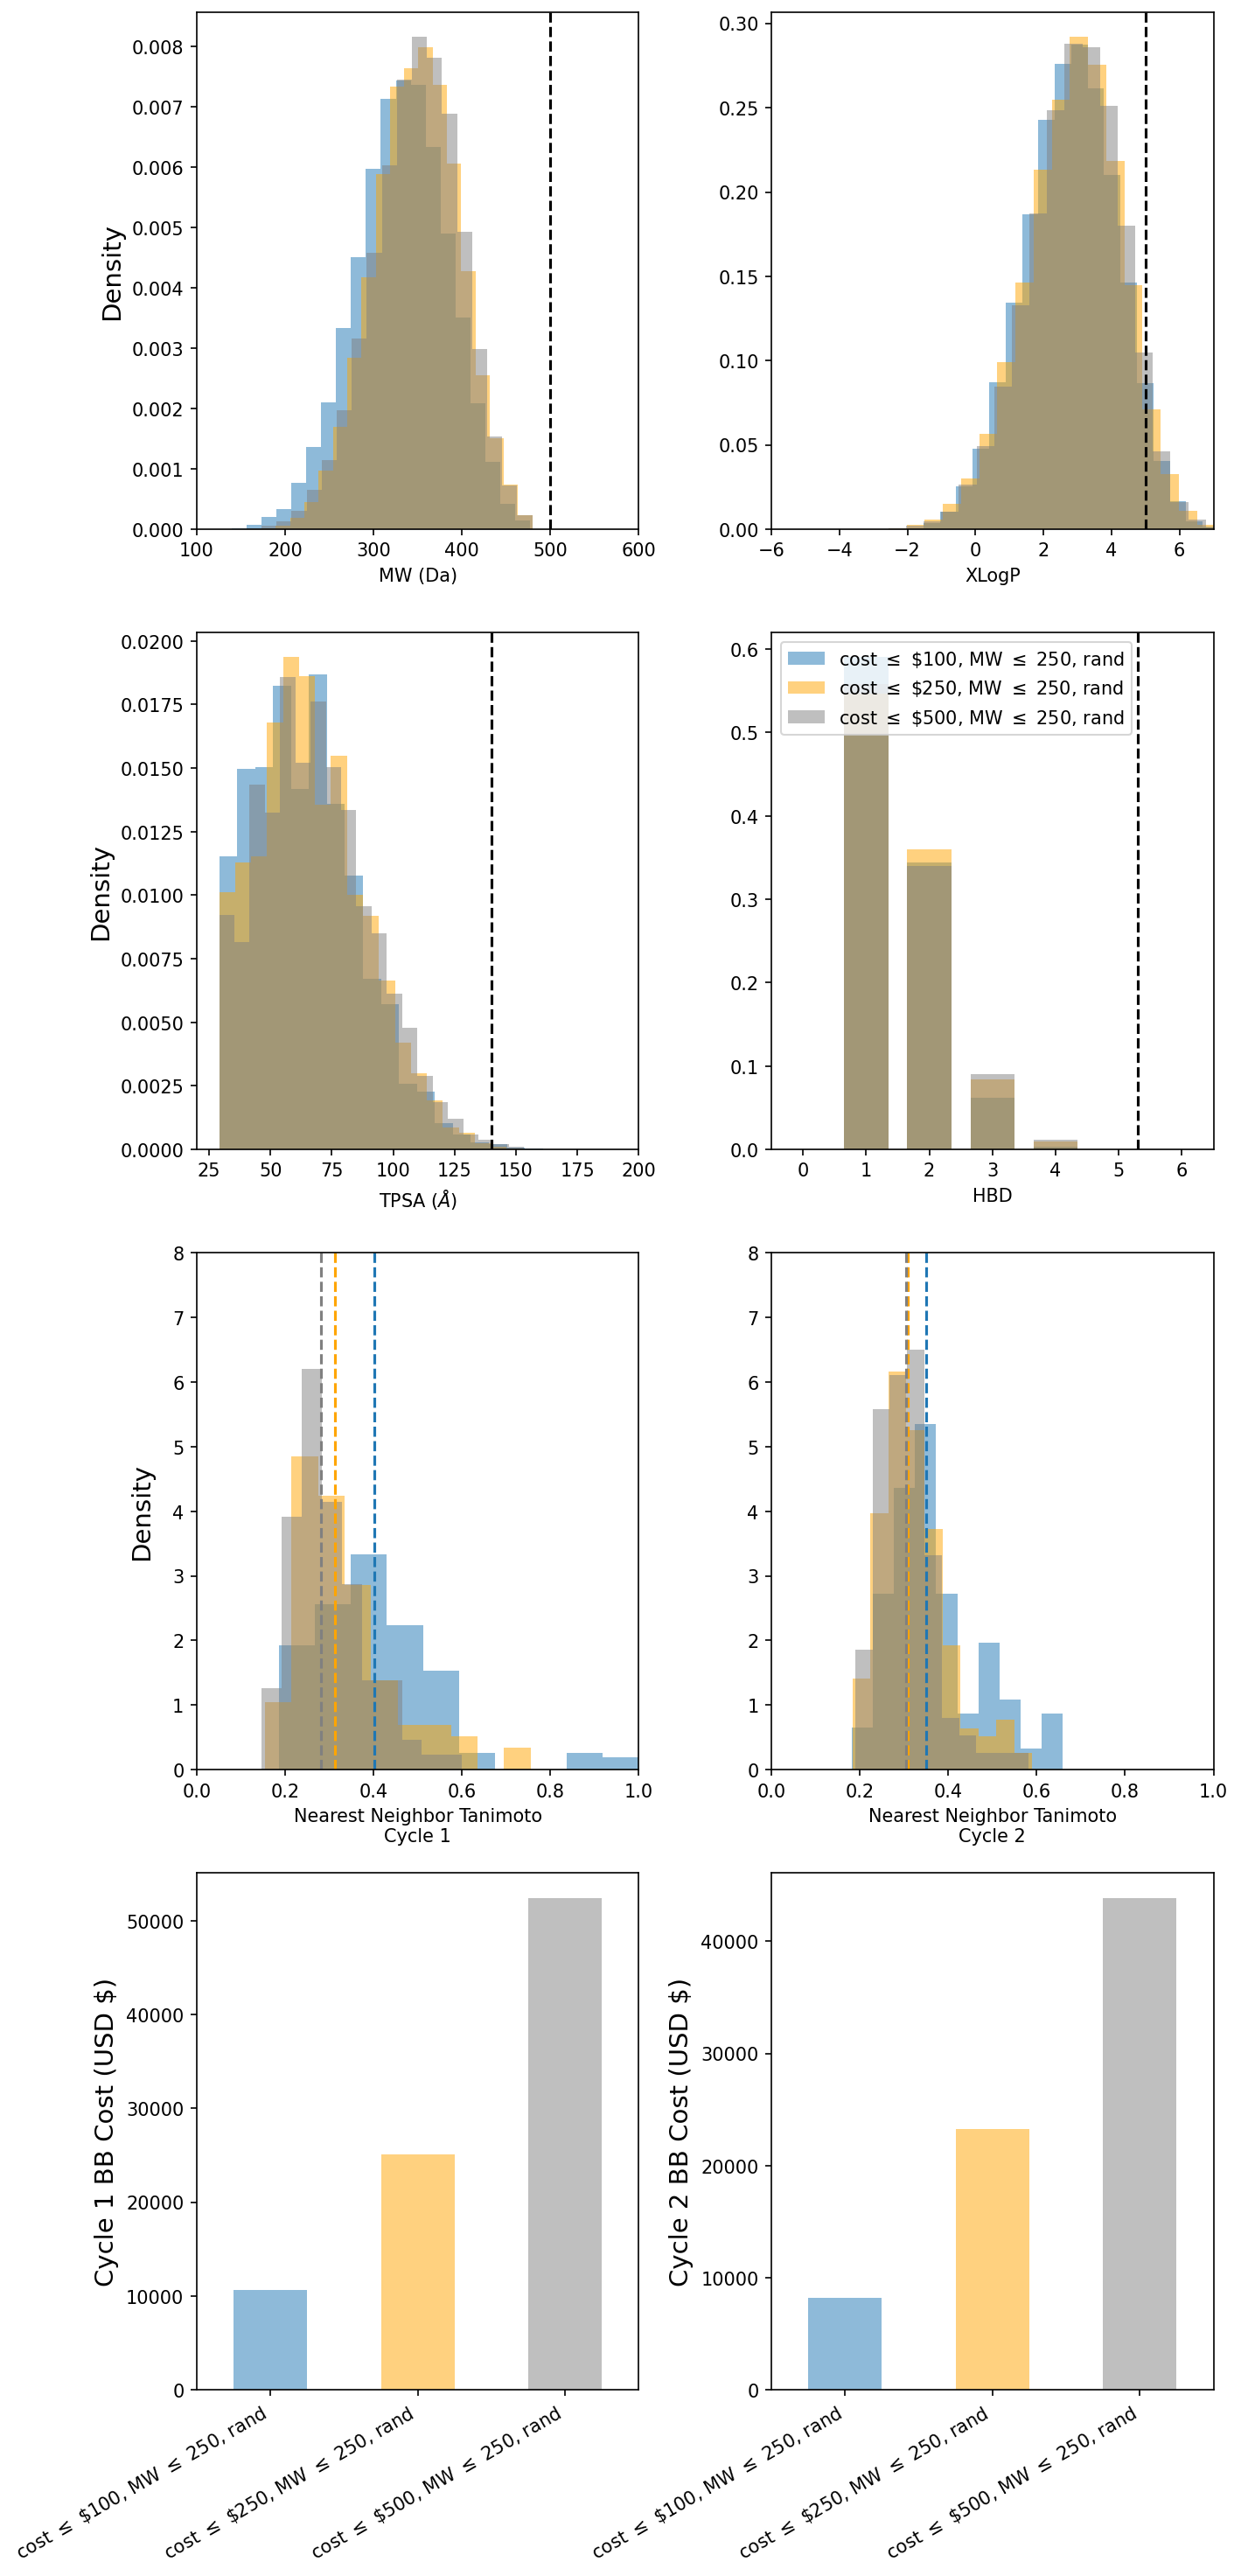

In [28]:
# Generate library summary
cost_fig = plot_library_stats(lib1_p1_BBs, lib1_p2_BBs, library_1, 'cost $\leq$ \$100, MW $\leq$ 250, rand',
                              lib2_p1_BBs, lib2_p2_BBs, library_2, 'cost $\leq$ \$250, MW $\leq$ 250, rand',
                              lib3_p1_BBs, lib3_p2_BBs, library_3, 'cost $\leq$ \$500, MW $\leq$ 250, rand')

# Save figure
#cost_fig.savefig('../../figures/lib_enum_cost.png', bbox_inches='tight')

### Example 3: three libraries with constant MW and cost filters, but different selection strategies

#### Library 1: cost $\leq$ 250, MW $\leq$ 250, random selection (192 x 192)

In [29]:
lib1_cost = [250, 250]
lib1_mw = [250, 250]
lib1_nBBs = [192, 192]

lib1_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib1_cost[0]) & (pamine_umap['MW'] <= lib1_mw[0])]
lib1_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib1_cost[1]) & (cooh_umap['MW'] <= lib1_mw[1])]

lib1_p1_BBs = random_selection(lib1_p1_sele, lib1_nBBs[0], seed=0)
lib1_p2_BBs = random_selection(lib1_p2_sele, lib1_nBBs[1], seed=0)

library_1 = lib_enum(lib1_p1_BBs, lib1_p2_BBs)

#### Library 2: cost $\leq$ 250, MW $\leq$ 250, uniform selection (192 x 192)

In [30]:
lib2_cost = [250, 250]
lib2_mw = [250, 250]
lib2_nBBs = [192, 192]

lib2_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib2_cost[0]) & (pamine_umap['MW'] <= lib2_mw[0])]
lib2_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib2_cost[1]) & (cooh_umap['MW'] <= lib2_mw[1])]

lib2_p1_BBs = uniform_selection(lib2_p1_sele, lib2_nBBs[0], seed=0)
lib2_p2_BBs = uniform_selection(lib2_p2_sele, lib2_nBBs[1], seed=0)

library_2 = lib_enum(lib2_p1_BBs, lib2_p2_BBs)

#### Library 3: cost $\leq$ 250, MW $\leq$ 250, diversity selection (192 x 192)

In [31]:
lib3_cost = [250, 250]
lib3_mw = [250, 250]
lib3_nBBs = [192, 192]

lib3_p1_sele = pamine_umap.loc[(pamine_umap['Price_250mg'] <= lib3_cost[0]) & (pamine_umap['MW'] <= lib3_mw[0])]
lib3_p2_sele = cooh_umap.loc[(cooh_umap['Price_250mg'] <= lib3_cost[1]) & (cooh_umap['MW'] <= lib3_mw[1])]

lib3_p1_BBs = diversity_selection(lib3_p1_sele, lib3_nBBs[0], seed=0)
lib3_p2_BBs = diversity_selection(lib3_p2_sele, lib3_nBBs[1], seed=0)

library_3 = lib_enum(lib3_p1_BBs, lib3_p2_BBs)

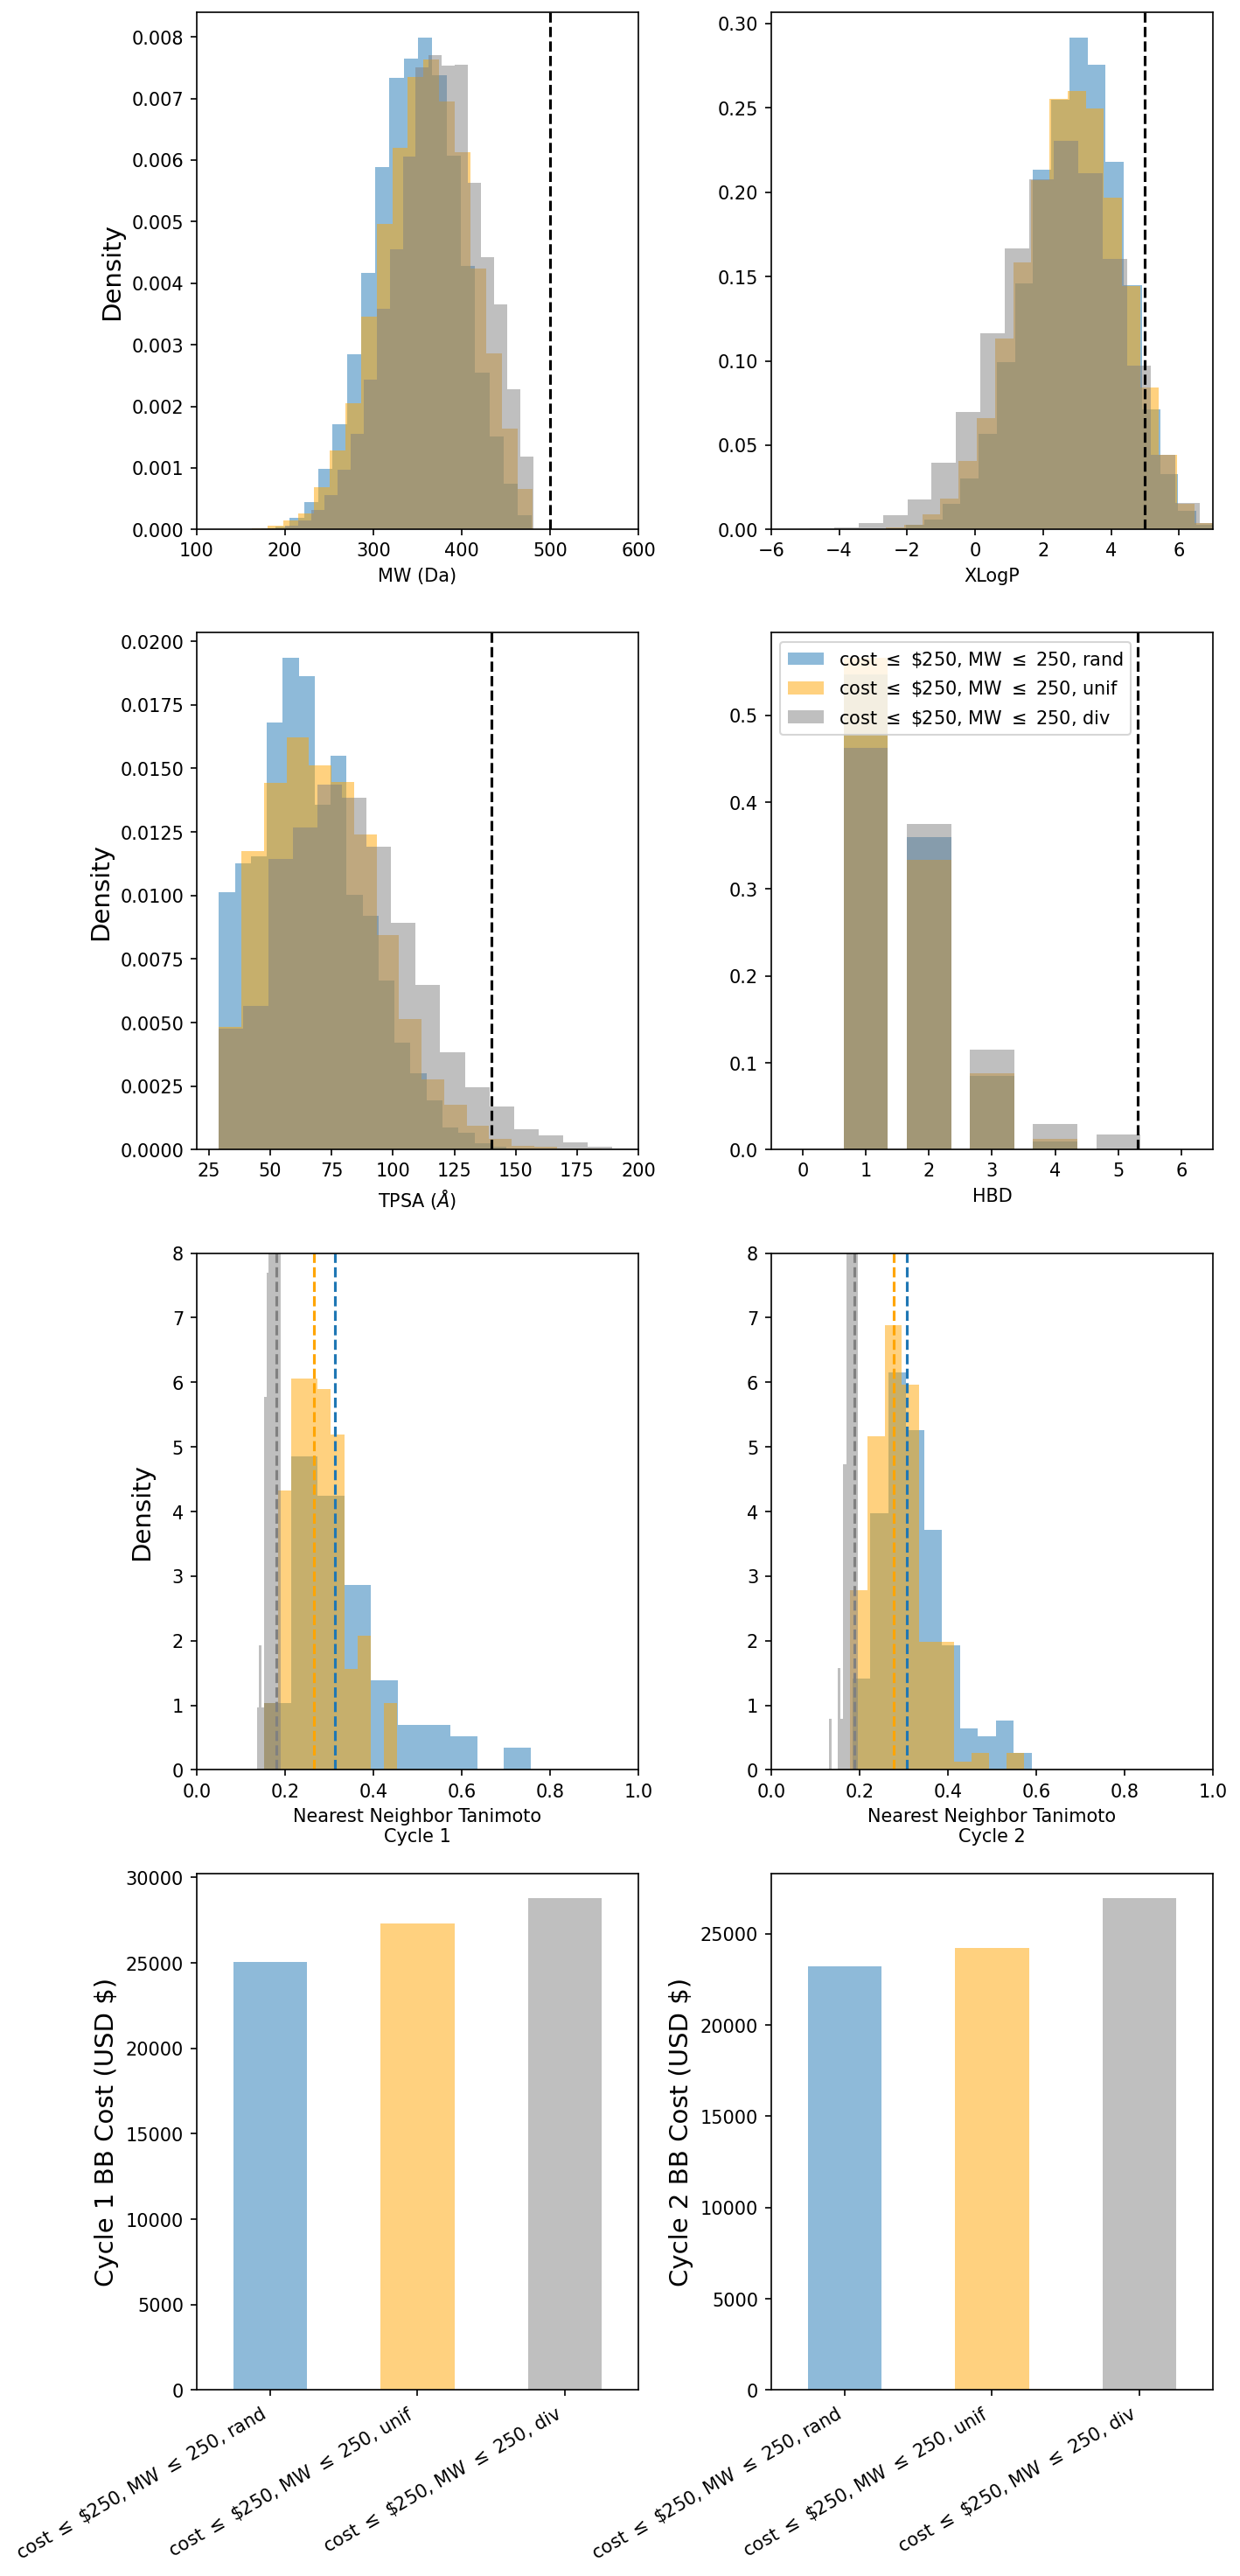

In [32]:
# Generate library summary
sele_fig = plot_library_stats(lib1_p1_BBs, lib1_p2_BBs, library_1, 'cost $\leq$ \$250, MW $\leq$ 250, rand',
                              lib2_p1_BBs, lib2_p2_BBs, library_2, 'cost $\leq$ \$250, MW $\leq$ 250, unif',
                              lib3_p1_BBs, lib3_p2_BBs, library_3, 'cost $\leq$ \$250, MW $\leq$ 250, div')

# Save figure
#sele_fig.savefig('../../figures/lib_enum_selection.png', bbox_inches='tight')